## Step 1: Data Loading
In this step, we'll read the Excel file and load the required sheet. Let's get started.

In [20]:
import pandas as pd

# Read the Excel file and the specific sheet
sheet_names = pd.ExcelFile('./data.xlsx').sheet_names
sheet1_data = pd.read_excel('./data.xlsx', sheet_name=sheet_names[0])
sheet1_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
1,20230807,1747578422390810,US,USCA,1,2023-07-24 00:00:00,5132.17,4795.25,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation
2,20230807,1758543228094480,SA,MENA,1,2023-06-14 00:00:00,1976.25,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged)
3,20230807,1738303151826990,AU,AU,2,2023-07-24 00:00:00,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation
4,20230807,1738303920938010,NZ,NZ,2,2023-07-24 00:00:00,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation


## Step 2: Data Cleaning
Now, we'll clean up the data. This involves setting the correct headers and converting the `start_time` column to a datetime format for easy plotting.

In [21]:
# Set the correct headers for the data
sheet1_data.columns = sheet1_data.iloc[0]
sheet1_data = sheet1_data.drop(0)

# Convert 'start_time' to datetime format for plotting
sheet1_data['start_time'] = pd.to_datetime(sheet1_data['start_time'])
sheet1_data.head()

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
1,20230807,1747578422390810,US,USCA,1,2023-07-24 00:00:00,5132.17,4795.25,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation
2,20230807,1758543228094480,SA,MENA,1,2023-06-14 00:00:00,1976.25,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged)
3,20230807,1738303151826990,AU,AU,2,2023-07-24 00:00:00,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation
4,20230807,1738303920938010,NZ,NZ,2,2023-07-24 00:00:00,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
5,20230807,1738304016410620,NZ,NZ,2,2023-07-24 00:00:00,1.525,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation


## Step 3: Focusing on the Spike
We observed a spike in the data around August 2023. To make the visualization more informative, we'll focus on this spike by filtering the data to a specific date range: 15th July 2023 to 15th August 2023.

In [22]:
# Define the date range to focus on the spike
start_date = '2023-07-15'
end_date = '2023-08-15'

# Filter the data based on the date range
filtered_data = sheet1_data[(sheet1_data['start_time'] >= start_date) & (sheet1_data['start_time'] <= end_date)]
filtered_data.head()

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
106,20230807,1771745713852450,AU,AU,2,2023-08-07 00:00:00,0.03,6.0239,2023-07-18 08:19:00,1.84,RIE,Ad Group Recall (Merged)
129,20230807,1772305673447440,CA,US&CA,2,2023-08-05 00:00:00,130.19,44.2432,2023-07-24 12:40:00,1.81,RIE,Ad Group Recall (Merged)
152,20230807,1771496742750200,CA,US&CA,1,2023-08-07 00:00:00,49.09,46.883,2023-07-15 15:21:00,1.81,RIE,Ad Group Recall (Merged)
154,20230807,1771473761239070,ZA,Other,1,2023-08-07 00:00:00,1.91,19.4858,2023-07-15 09:17:00,1.62,RIE,Ad Group Recall (Merged)
156,20230807,1769826449034250,CA,US&CA,NaN,2000-01-01 00:00:00,27100.62,17144.4986,2023-07-27 15:00:00,1.81,RIE,Ad Group Recall (Merged)


## Step 4: Visualization
Now, let's plot the distribution of ads for this filtered date range to clearly see the spike in data.

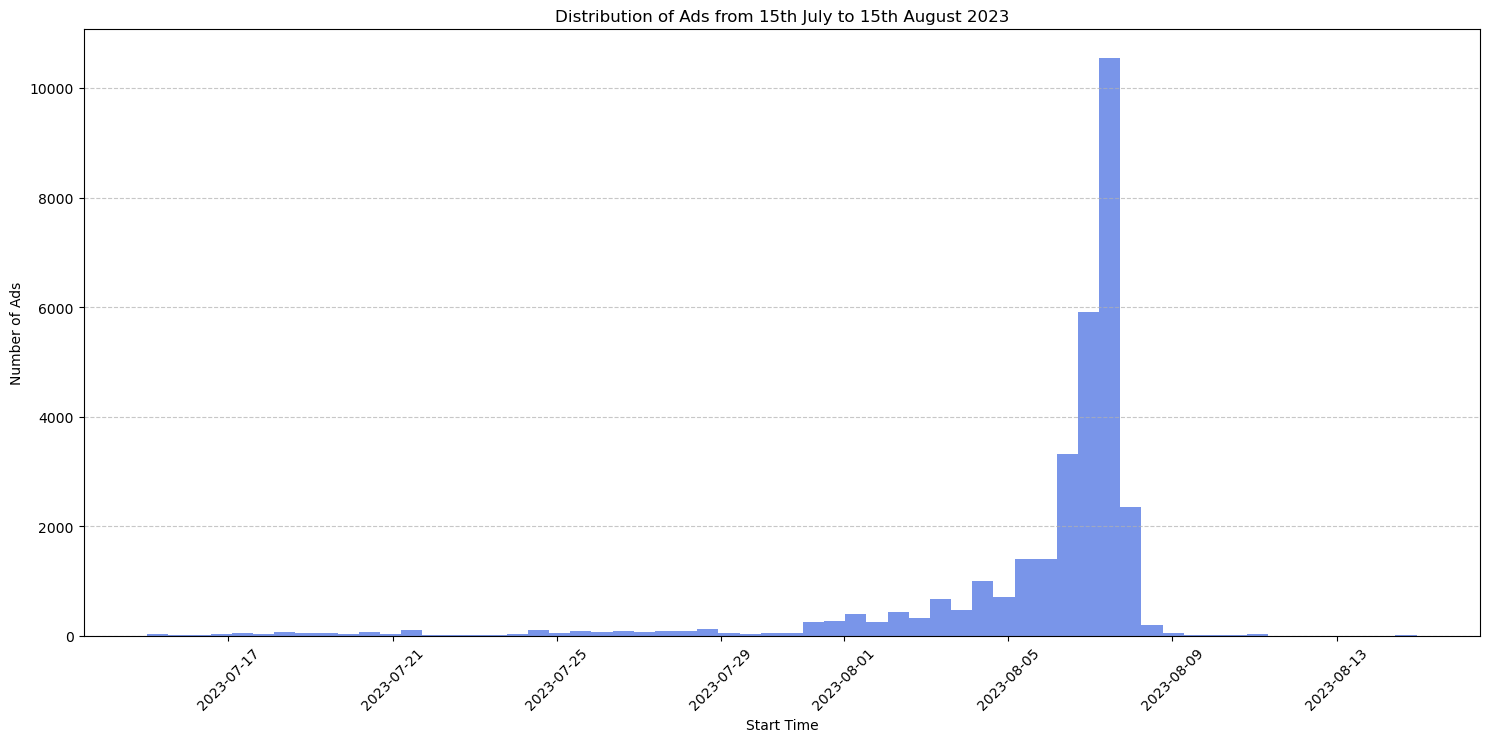

In [23]:
import matplotlib.pyplot as plt

# Plot the distribution of ads for the filtered date range
plt.figure(figsize=(15, 7))
plt.hist(filtered_data['start_time'].dropna(), bins=60, color='royalblue', alpha=0.7)
plt.title('Distribution of Ads from 15th July to 15th August 2023')
plt.xlabel('Start Time')
plt.ylabel('Number of Ads')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()